# EDA and Prediction

Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

In [15]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick #######
import matplotlib.pyplot as plt
sns.set(style = 'whitegrid')


**Let us read the data file in the python notebook**

In [2]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_cust.shape

(7043, 21)

## Data Cleaning

In [5]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
telecom_cust.dropna(inplace = True)

In [8]:
df2 = telecom_cust.iloc[:,1:]

## Feature Engineering

In [9]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [23]:
df= pd.get_dummies(df2)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Data Exploration

<AxesSubplot:>

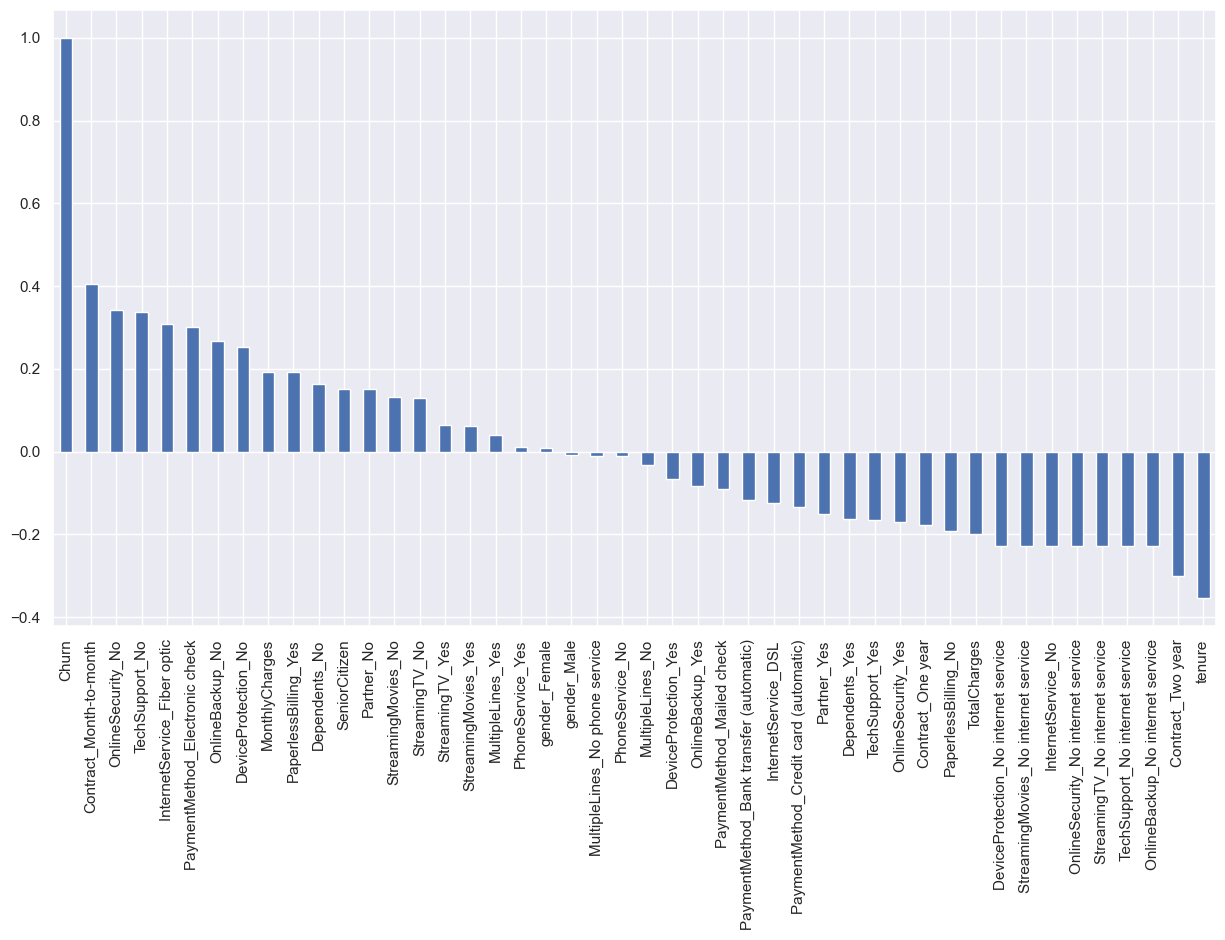

In [24]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

 **Gender Distribution** 

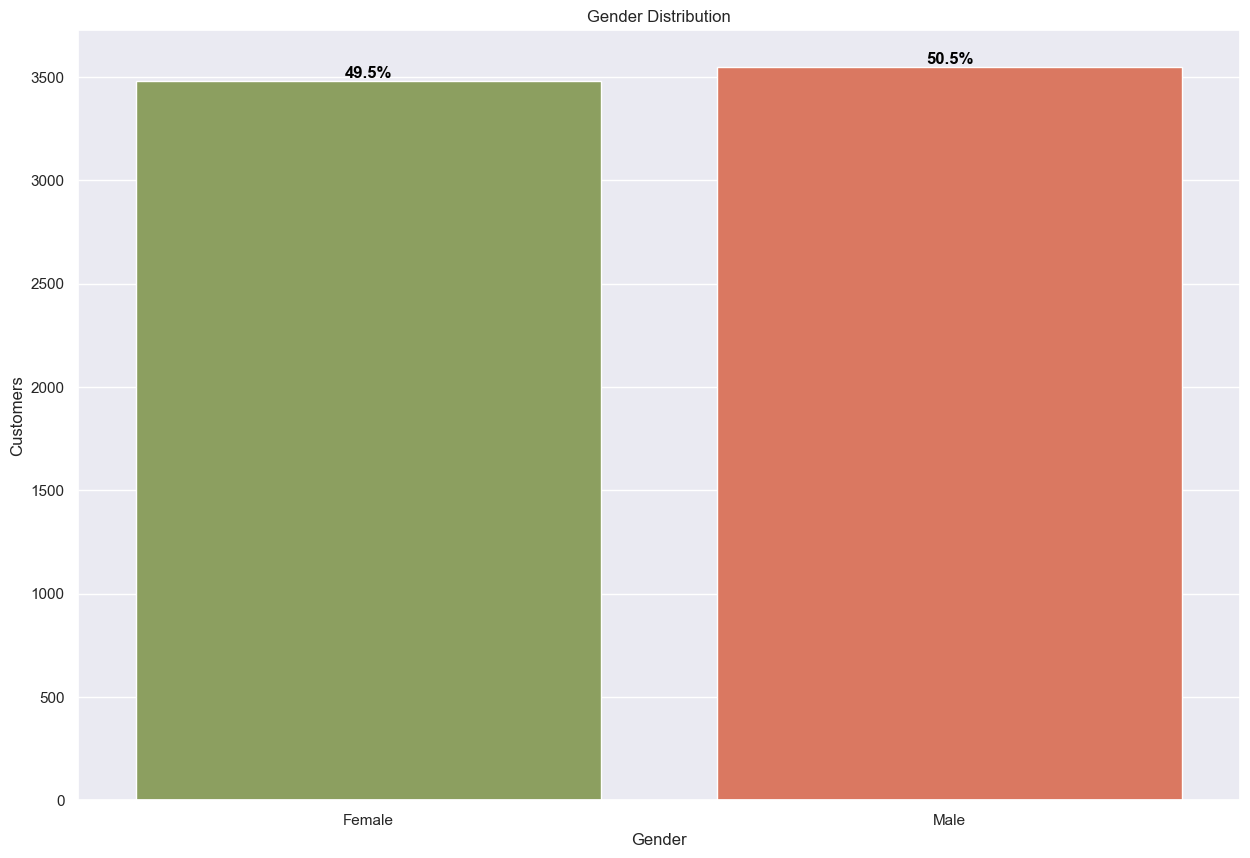

In [55]:
# Set the color palette
colors = ['#90a955', '#ee6c4d'] 

# Plot the gender distribution
ax = sns.countplot(x='gender', data=telecom_cust, palette=colors)

# Calculate the percentage of customers for each gender
total = len(telecom_cust)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='Black', weight='bold')

# Set the y-axis label as 'Customers'
ax.set_ylabel('Customers')

# Set the x-axis label as 'Gender'
ax.set_xlabel('Gender')

# Set the title of the plot
ax.set_title('Gender Distribution')

# Show the plot
plt.show()

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


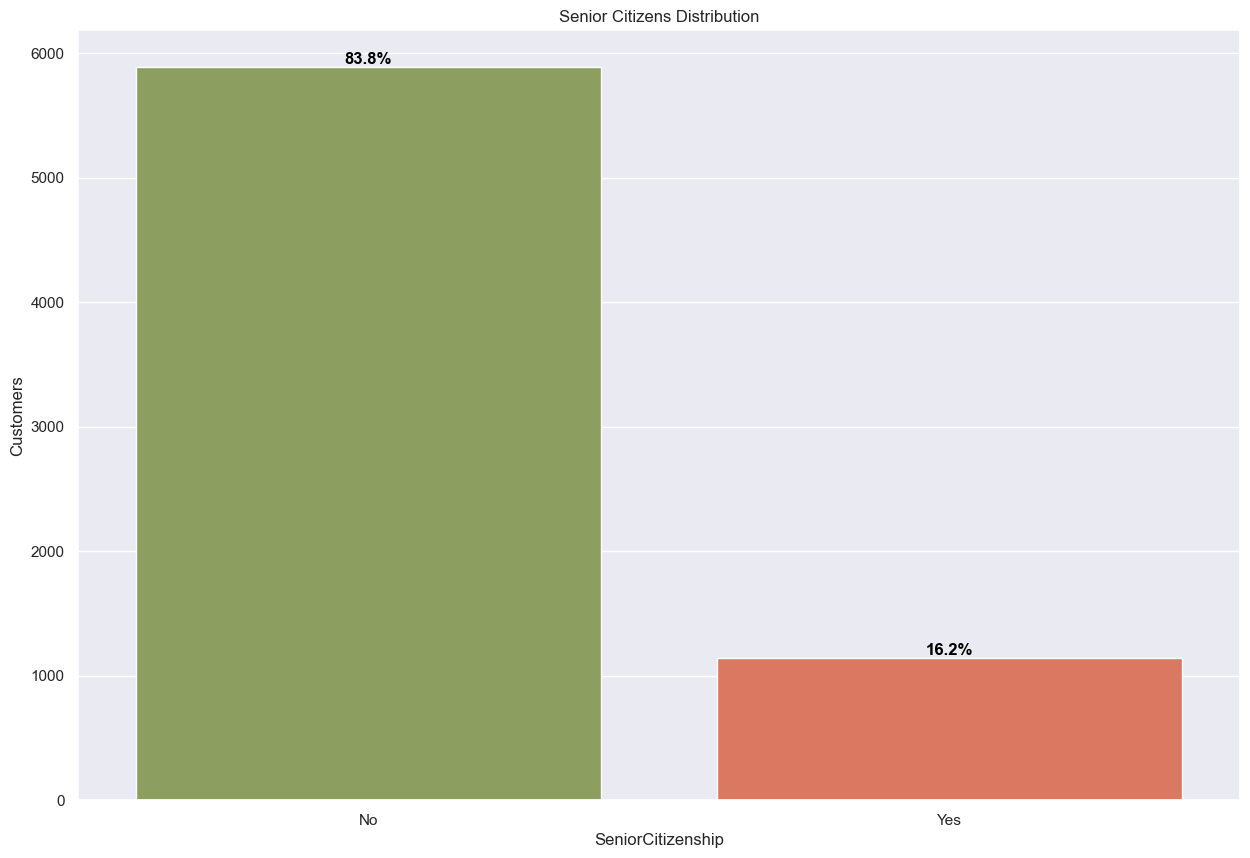

In [54]:
# Set the color palette
colors = ['#90a955', '#ee6c4d'] 

# Plot the senior citizenship distribution
ax = sns.countplot(x='SeniorCitizen', data=telecom_cust, palette=colors)

# Set the x-axis tick labels
ax.set_xticklabels(['No', 'Yes'])

total = len(telecom_cust)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, color='black', weight='bold')

# Set the y-axis label as 'Customers'
ax.set_ylabel('Customers')

# Set the x-axis label as 'SeniorCitizenship'
ax.set_xlabel('SeniorCitizenship')

# Set the title of the plot
ax.set_title('Senior Citizens Distribution')

# Show the plot
plt.show()


 **Partner and dependent status**

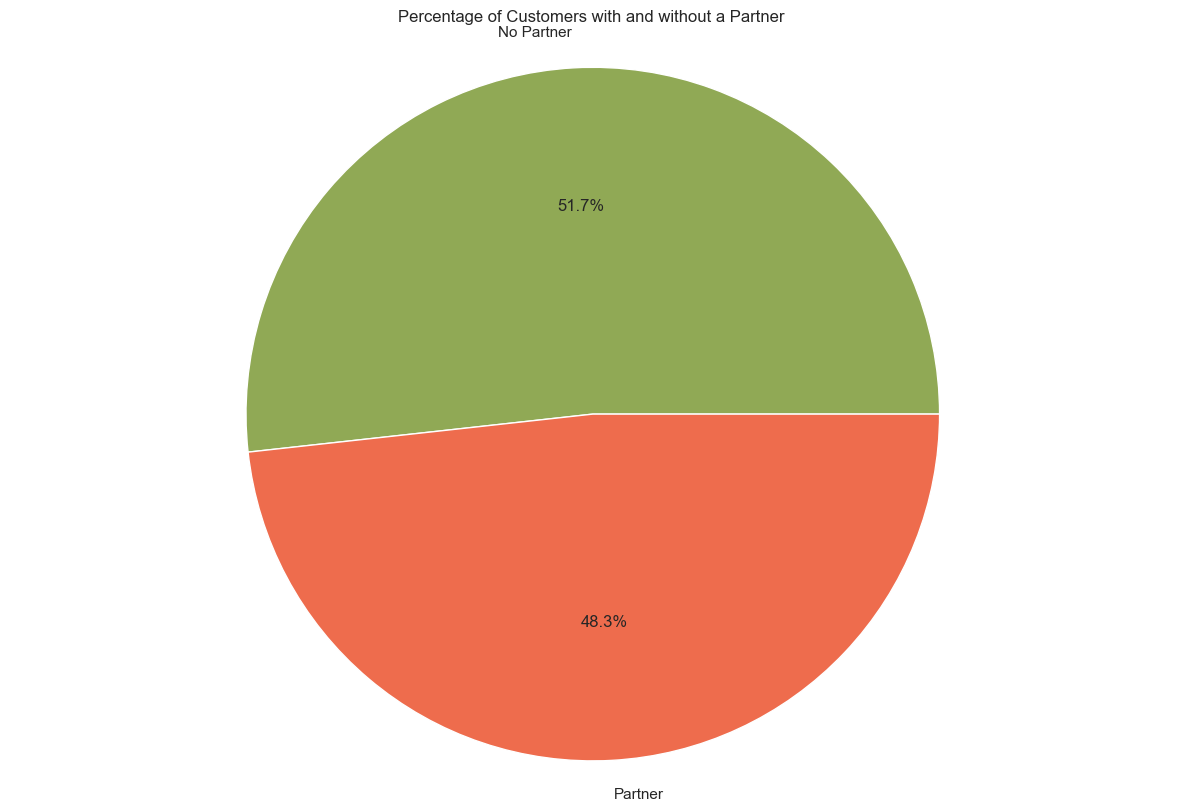

In [53]:
# Count the occurrence
partner_counts = telecom_cust['Partner'].value_counts()

# Calculate the percentage
partner_percentages = partner_counts / len(telecom_cust) * 100

colors = ['#90a955', '#ee6c4d'] 

# Create the pie chart
labels = ['No Partner', 'Partner']
plt.pie(partner_percentages, labels=labels, autopct='%.1f%%', colors=colors)
plt.title('Percentage of Customers with and without a Partner')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


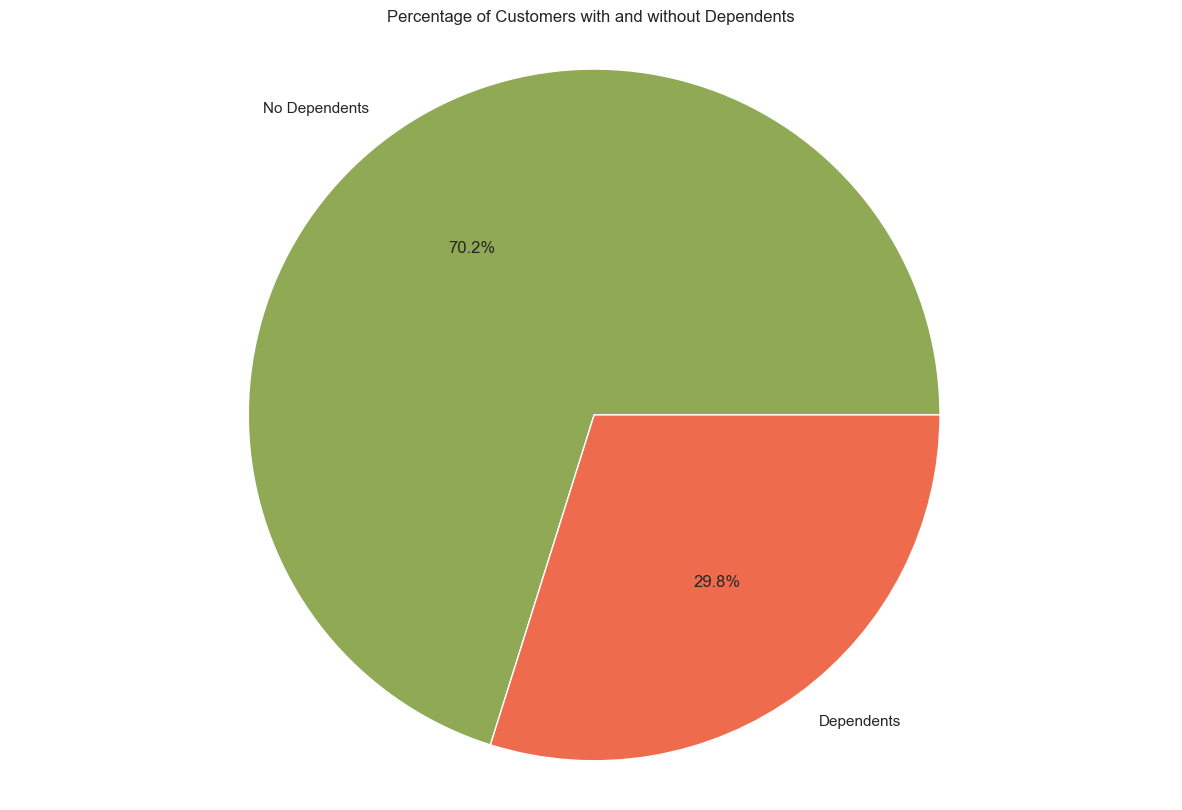

In [52]:
# Count the occurrence
dependents_counts = telecom_cust['Dependents'].value_counts()

# Calculate the percentage
dependents_percentages = dependents_counts / len(telecom_cust) * 100

colors = ['#90a955', '#ee6c4d'] 

# Create another pie chart for Dependents
labels = ['No Dependents', 'Dependents']
plt.pie(dependents_percentages, labels=labels, autopct='%.1f%%', colors=colors)
plt.title('Percentage of Customers with and without Dependents')
plt.axis('equal')
plt.show()

**Services**

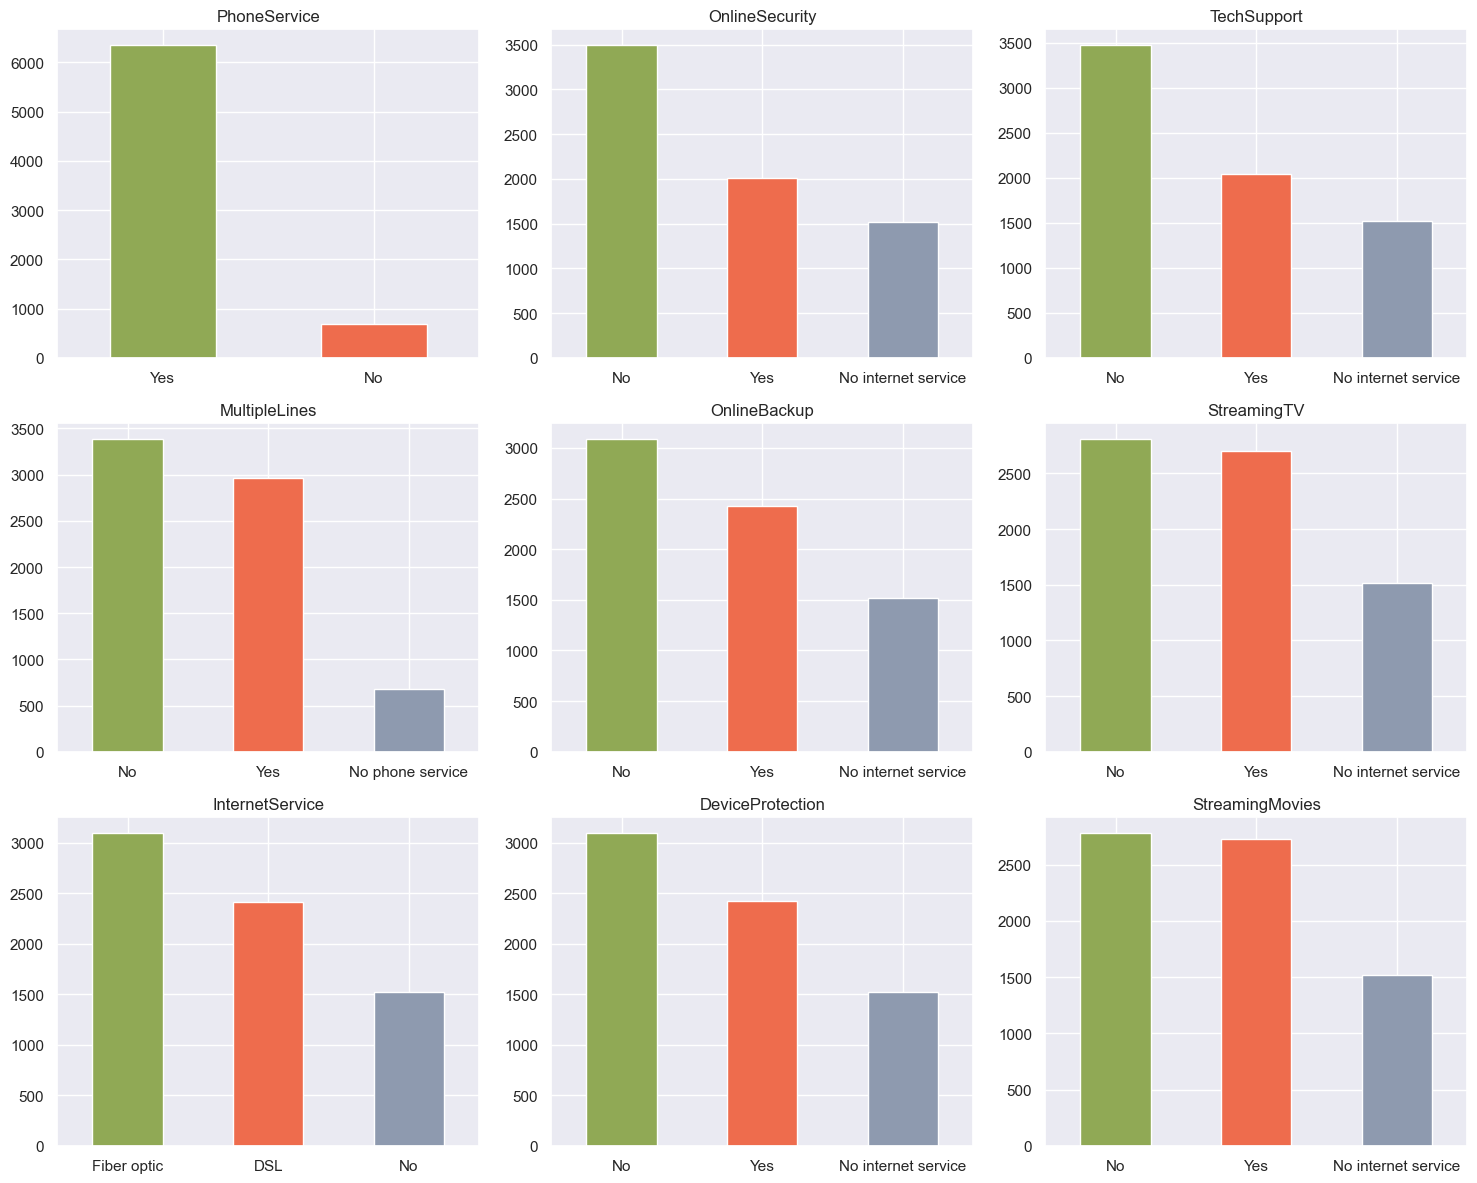

In [57]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

colors = ['#90a955', '#ee6c4d', '#8e9aaf']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color=colors)
    elif i >= 3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0, color=colors)
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0, color=colors)
    ax.set_title(item)

plt.tight_layout()
plt.show()


**Contracts**

Text(0.5, 1.0, '# of Customers by Contract Type')

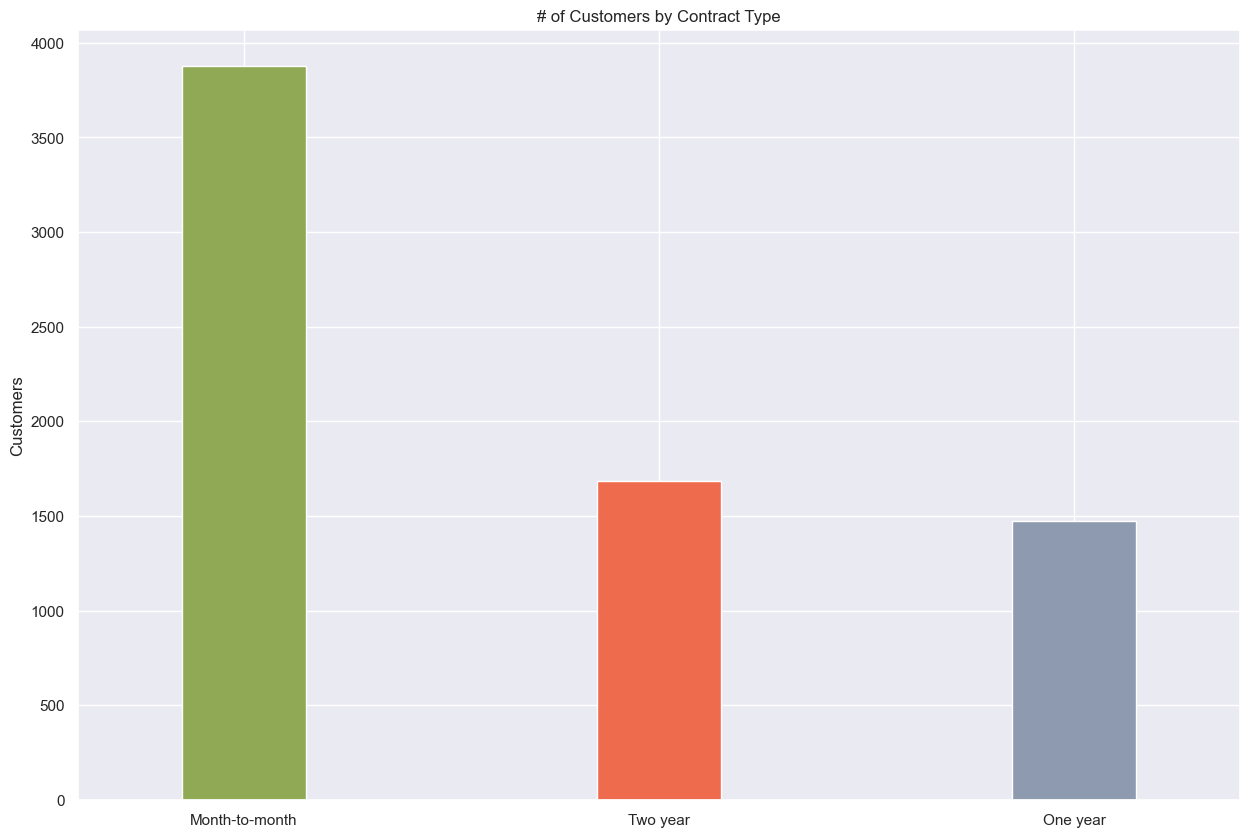

In [64]:
colors = ['#90a955', '#ee6c4d', '#8e9aaf']
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=colors)
ax.set_ylabel('Customers')
ax.set_title('# of Customers by Contract Type')

**1. Tenure:**  After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

C:\Users\makni\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers by tenure')

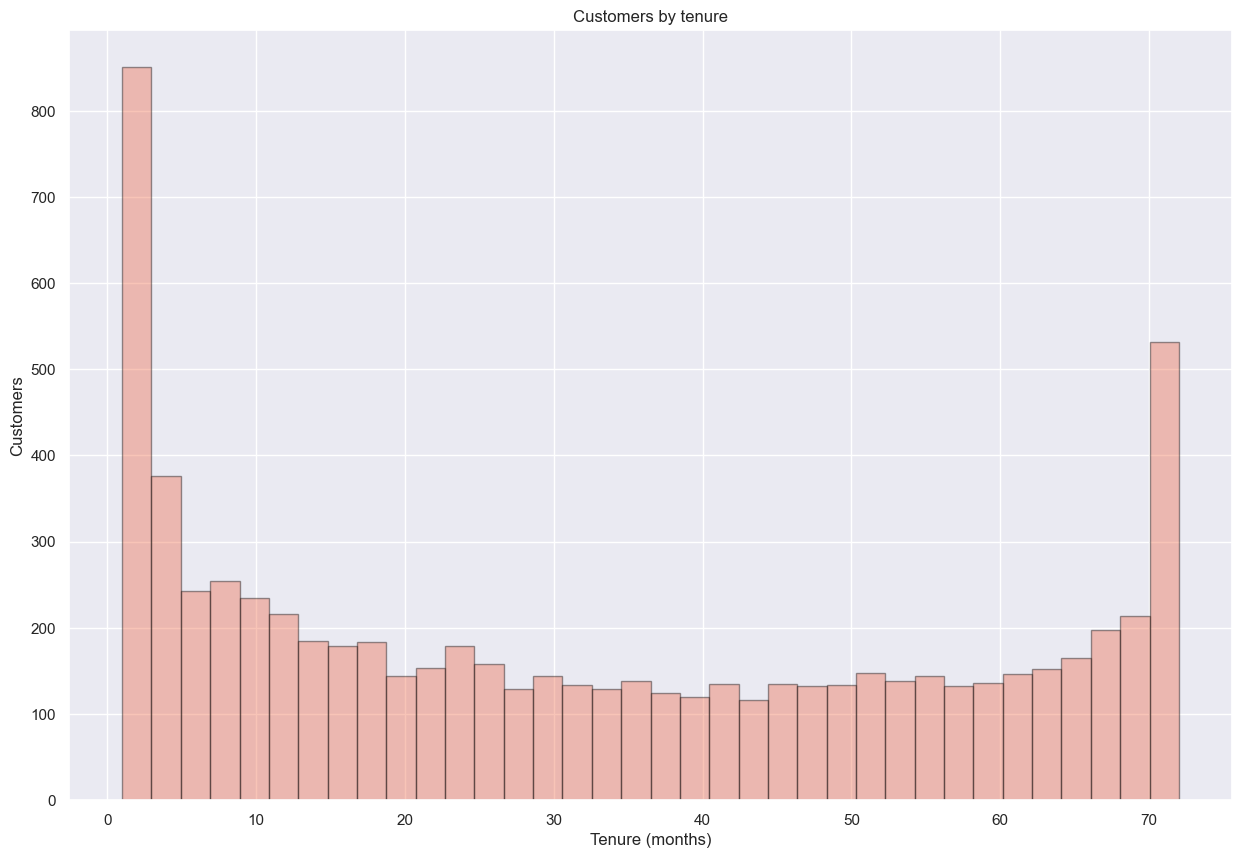

In [65]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = '#ee6c4d', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by tenure')

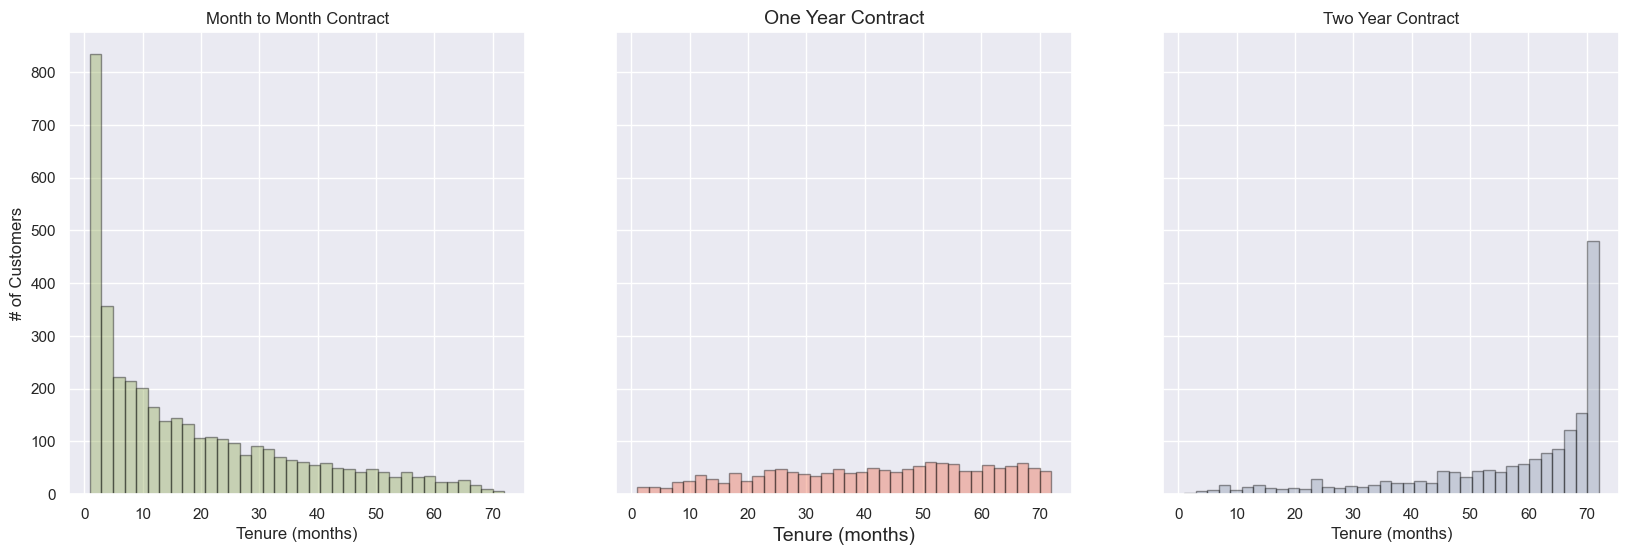

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#90a955', '#ee6c4d', '#8e9aaf']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color=colors[0],
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color=colors[1],
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax2)
ax.set_xlabel('Tenure (months)', size=14)
ax.set_title('One Year Contract', size=14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
                  hist=True, kde=False,
                  bins=int(180/5), color=colors[2],
                  hist_kws={'edgecolor': 'black'},
                  kde_kws={'linewidth': 4},
                  ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

plt.show()


### Relation between churn and other variables

1. Lets first look at the churn rate in our data

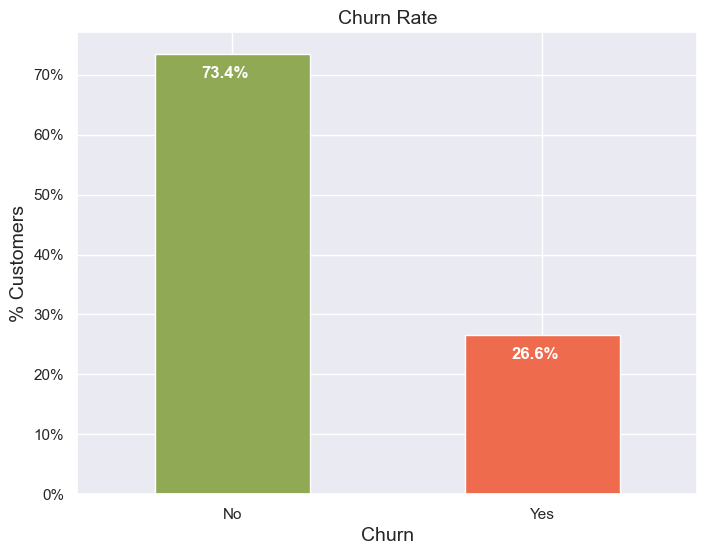

In [69]:
colors = ['#90a955', '#ee6c4d']

ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(8, 6)
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(
        i.get_x() + .15,
        i.get_height() - 4.0,
        str(round((i.get_height() / total), 1)) + '%',
        color='white',
        weight='bold',
        size=12
    )

plt.show()



skewness

**Churn vs Tenure**

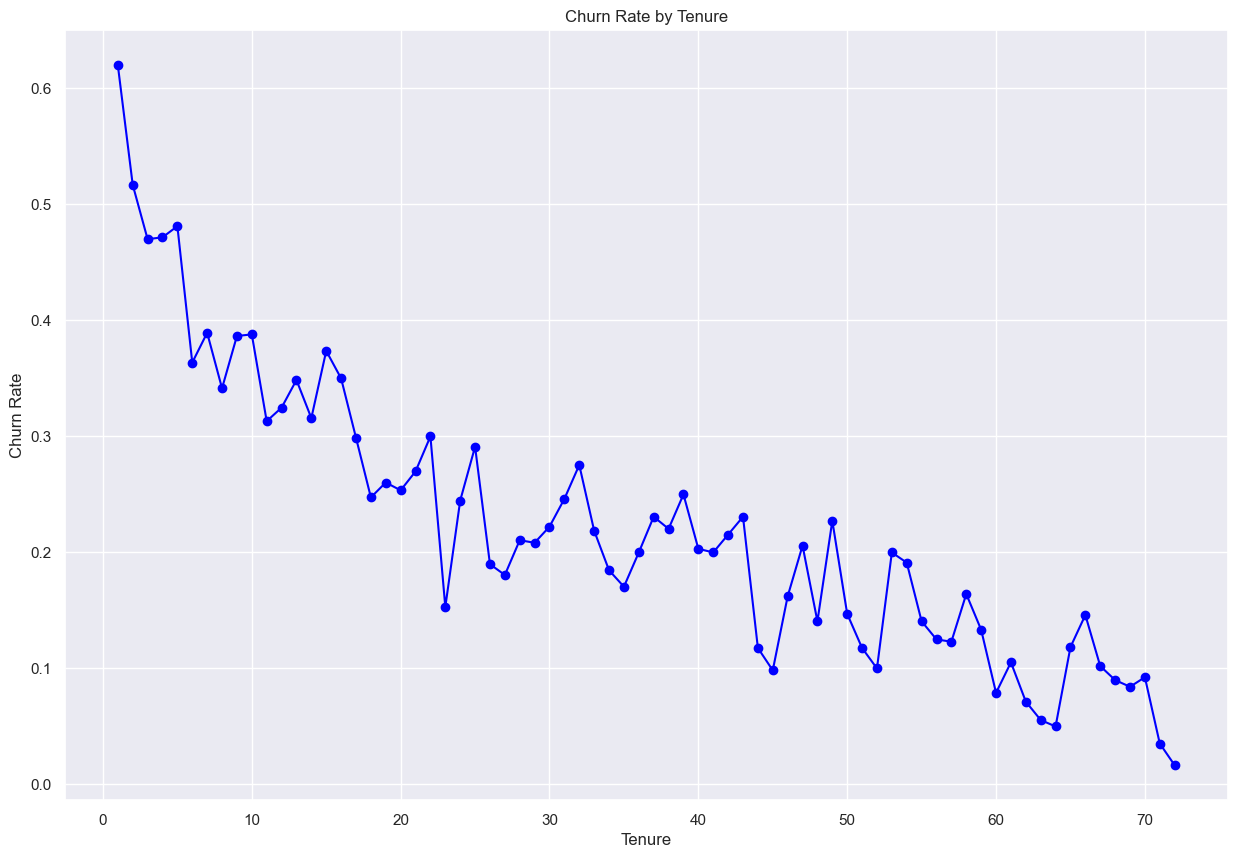

In [72]:
# Calculate churn rate by tenure
churn_by_tenure = df.groupby('tenure')['Churn'].mean()

# Create a line plot
plt.plot(churn_by_tenure.index, churn_by_tenure.values, marker='o', linestyle='-', color='blue')

# Set the axis labels and title
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')

# Show the plot
plt.show()


**Churn by Contract Type**

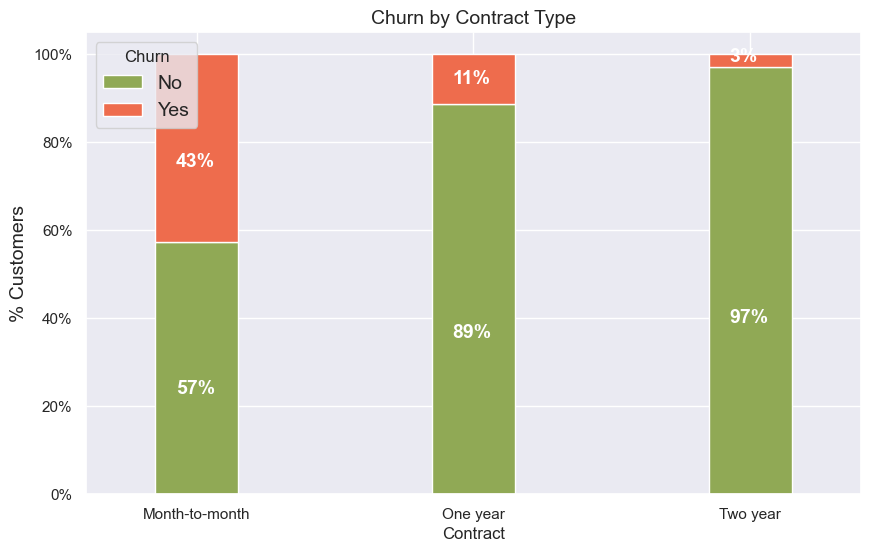

In [81]:
colors = ['#90a955', '#ee6c4d']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Churn by Seniority**

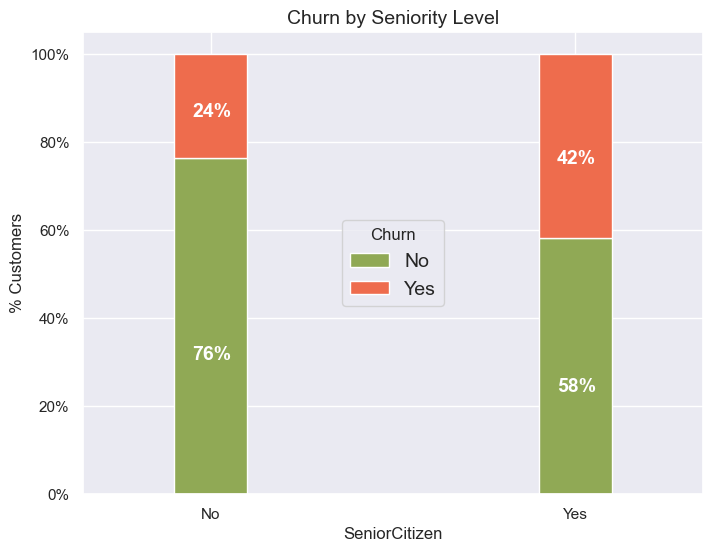

In [84]:
colors = ['#90a955', '#ee6c4d']
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',
    width=0.2,
    stacked=True,
    rot=0,
    figsize=(8, 6),
    color=colors
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level', size=14)

# Update x-axis tick labels
ax.set_xticklabels(['No', 'Yes'])

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + .25 * width, p.get_y() + .4 * height),
                color='white',
                weight='bold',
                size=14)

plt.show()


**Churn by Monthly Charges**

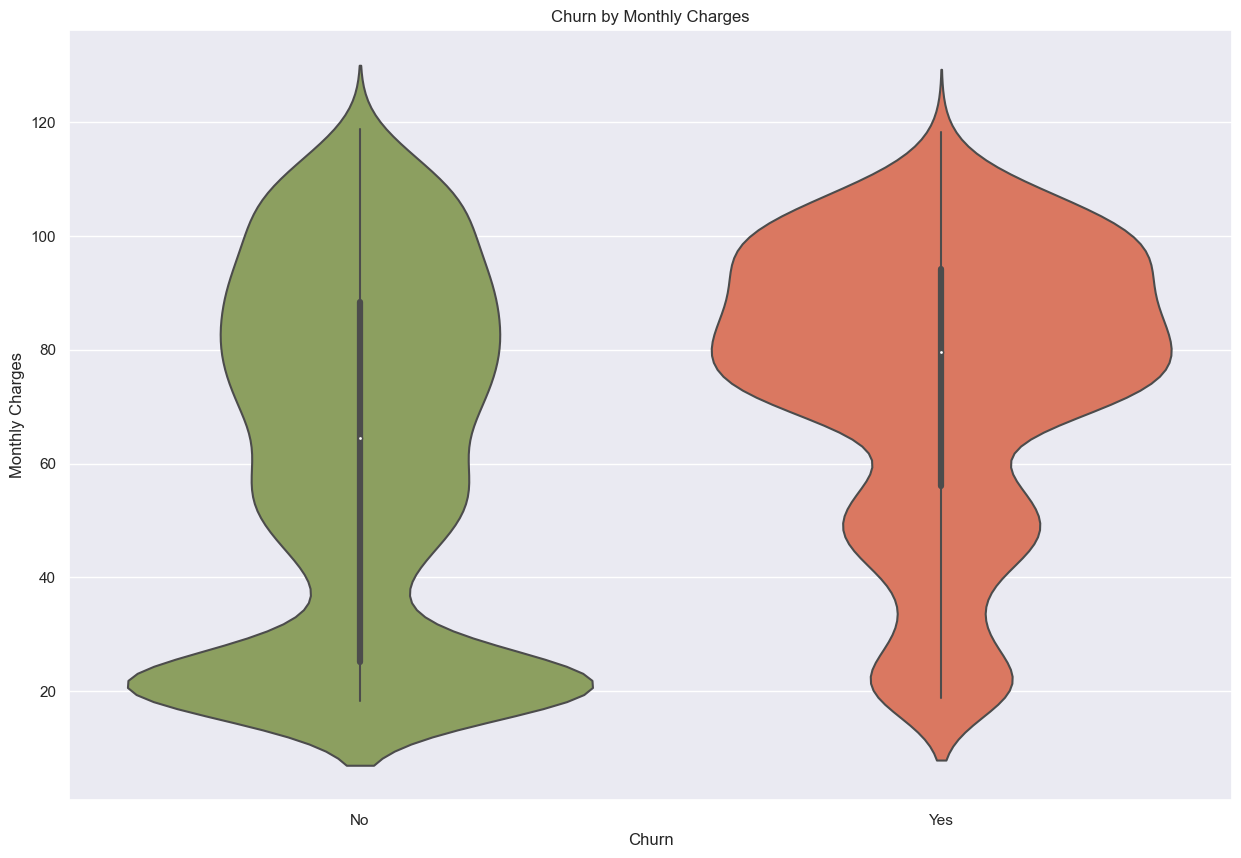

In [95]:
colors = ['#90a955', '#ee6c4d']

sns.violinplot(x='Churn', y='MonthlyCharges', data=telecom_cust, palette=colors)

plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Churn by Monthly Charges')

plt.show()


**Churn by Total Charges**

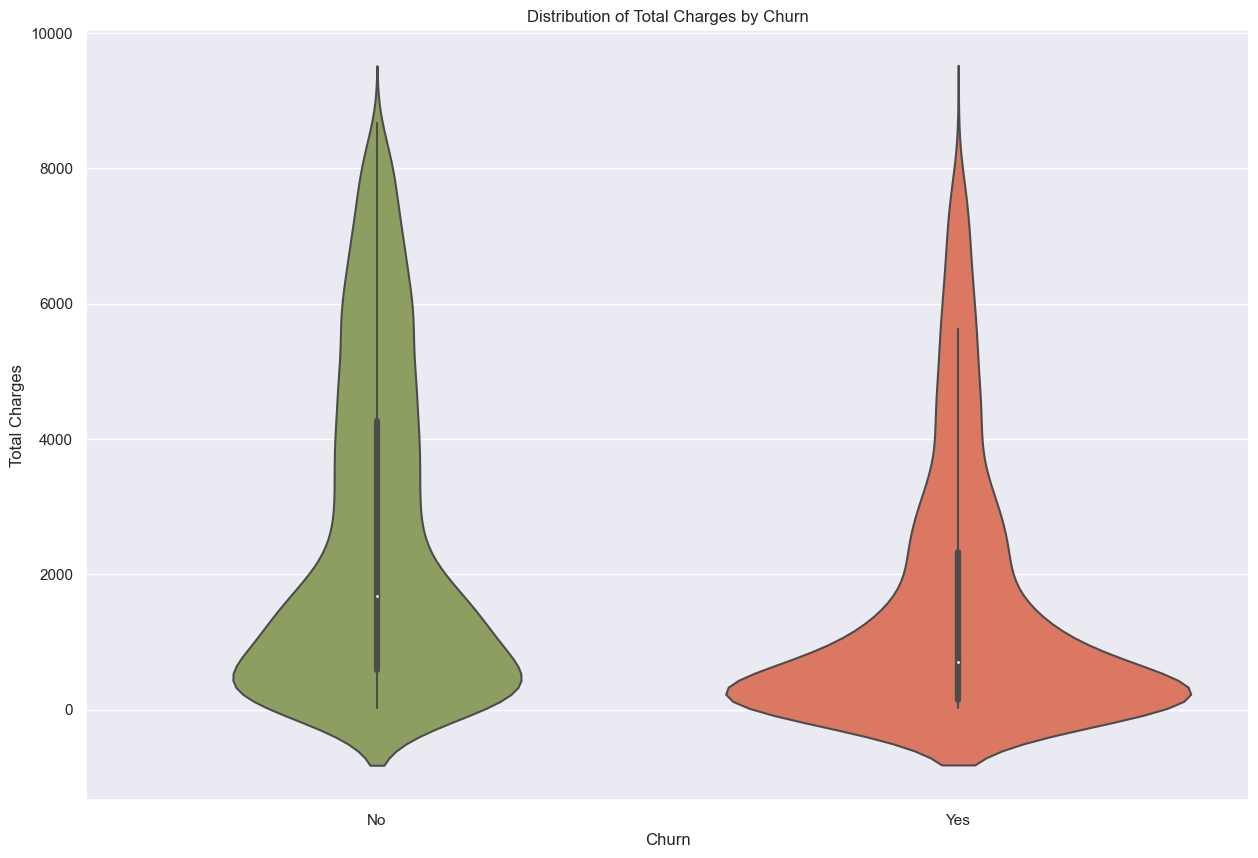

In [96]:
colors = ['#90a955', '#ee6c4d']

sns.violinplot(x='Churn', y='TotalCharges', data=telecom_cust, palette=colors)

plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.title('Distribution of Total Charges by Churn')

plt.show()


# Logistic Regression Model

In [106]:
y = df['Churn'].values
X = df.drop(columns = ['Churn'])

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [124]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [109]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


In [120]:
classification_report = metrics.classification_report(y_test, prediction_test)
print("Classification Report:\n", classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



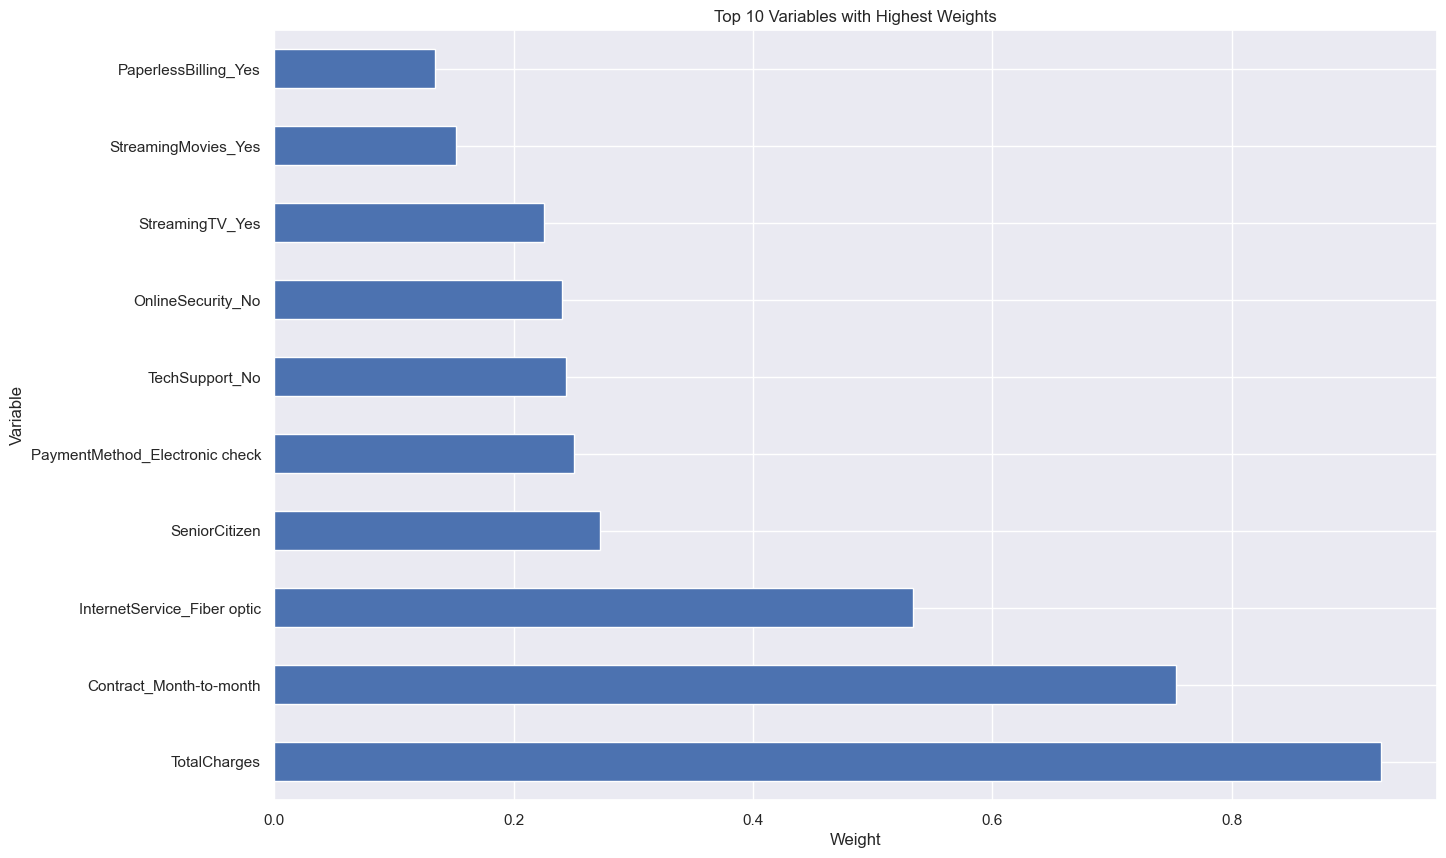

In [111]:
weights.sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel('Weight')
plt.ylabel('Variable')
plt.title('Top 10 Variables with Highest Weights')
plt.show()



AxesSubplot(0.125,0.11;0.775x0.77)


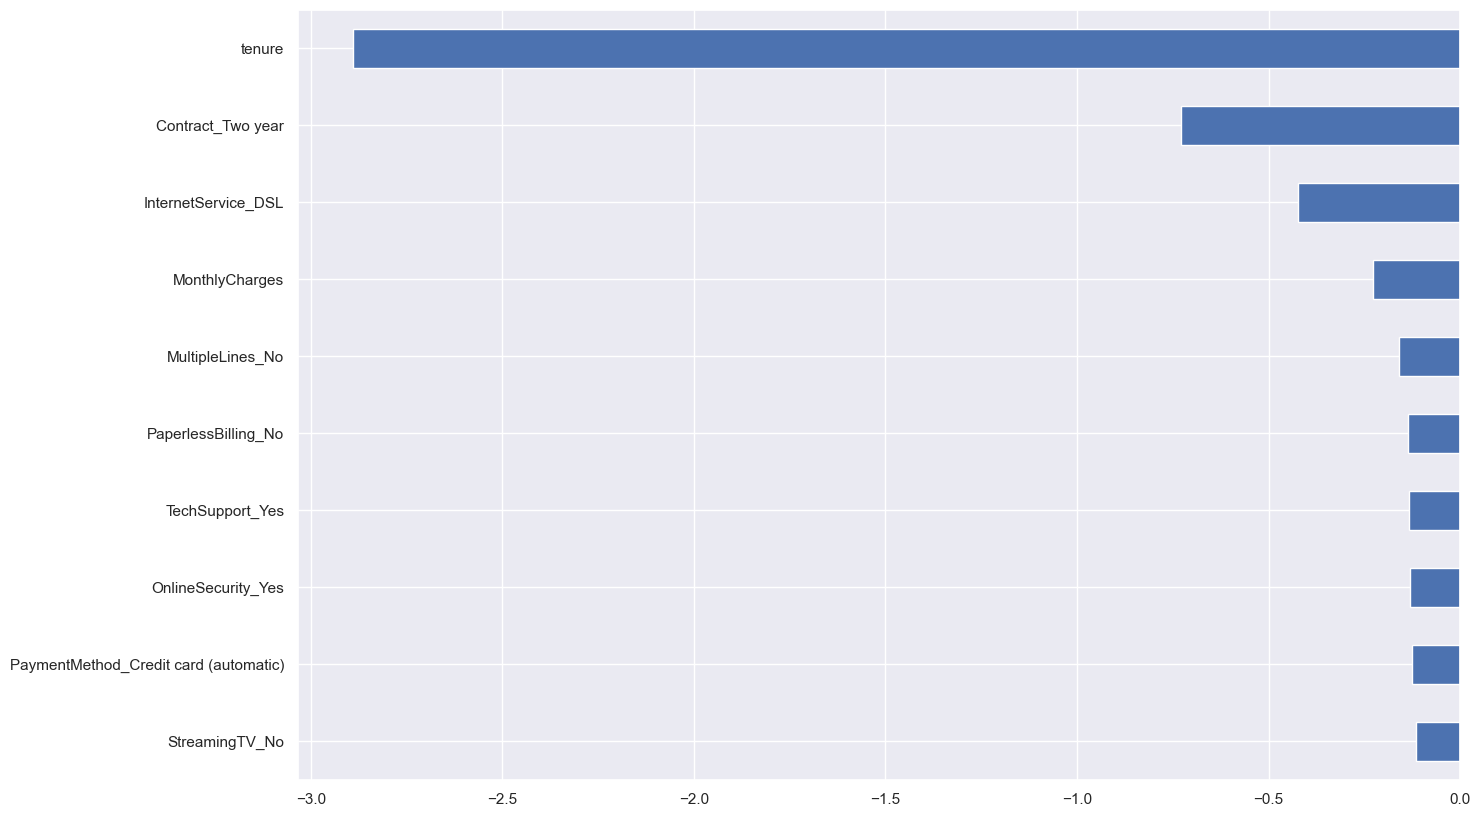

In [112]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh'))

In [125]:
# Select the desired subset of columns
selected_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'Contract_Month-to-month']

# Create a new DataFrame with the selected columns
X_subset = X[selected_columns]

# Split the data into training and testing sets using the subset of columns
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Train the logistic regression model with the subset of columns
model_subset = LogisticRegression()
model_subset.fit(X_train_subset, y_train)

# Make predictions on the test set using the subset of columns
prediction_test_subset = model_subset.predict(X_test_subset)

# Calculate the accuracy score and other metrics
accuracy_subset = metrics.accuracy_score(y_test, prediction_test_subset)
classification_report_subset = metrics.classification_report(y_test, prediction_test_subset)

# Print the accuracy score and classification report
print("Accuracy Score (Subset):", accuracy_subset)
print("Classification Report (Subset):\n", classification_report_subset)


Accuracy Score (Subset): 0.783226723525231
Classification Report (Subset):
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [126]:
import pickle
# Saving the model file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model_subset,f)

Two-month contracts and longer tenure are associated with a lower likelihood of churn. This means that customers who have longer contract durations or have been with the company for a longer time are less likely to cancel their services.

Having DSL internet service is associated with a reduced probability of churn. Customers with DSL internet service are less likely to cancel their subscriptions compared to other types of internet service.
From the given weights of each variable in the logistic regression model, we can extract the following insights:

Positive Weights:

Paperless billing (Yes): With a weight of 0.18, having paperless billing is associated with a slightly higher likelihood of churn.

Streaming movies (Yes): A weight of 0.19 suggests that customers who stream movies are slightly more likely to churn.

Streaming TV (Yes): Customers who have streaming TV services have a weight of 0.28, indicating a higher likelihood of churn.

Internet service (Fiber optic): The weight of 0.57 suggests that customers using fiber optic internet service are more likely to churn.

Contract (Month-to-month): With a weight of 0.78, having a month-to-month contract indicates a significantly higher likelihood of churn compared to other contract types.

Total charges: The weight of 0.98 suggests that higher total charges are associated with a higher likelihood of churn.

Negative Weights:

Tenure: The weight of -2.8 indicates that longer tenure is associated with a lower likelihood of churn.

Contract (Two-year): Having a two-year contract has a negative weight of -0.7, suggesting a lower likelihood of churn compared to month-to-month contracts.

Internet service (DSL): A weight of -0.49 indicates that customers with DSL internet service are less likely to churn compared to those with fiber optic service.

Monthly charges: The weight of -0.25 suggests that higher monthly charges are associated with a slightly lower likelihood of churn.

Multiple lines (No): Customers without multiple lines have a negative weight of -0.2, indicating a lower likelihood of churn.

Paperless billing (No): Having paper billing (non-paperless) has a negative weight of -0.17, suggesting a lower likelihood of churn.

These weights provide an indication of the relative importance and impact of each variable on the likelihood of churn. Positive weights suggest variables that increase the likelihood of churn, while negative weights suggest variables that decrease the likelihood of churn. However, it's important to note that these interpretations are based solely on the magnitude and sign of the weights and should be interpreted in conjunction with further analysis and consideration of the specific context and dataset.
On the other hand, higher total charges, monthly contracts, fiber optic internet services, and seniority can lead to higher churn rates. This means that customers with higher total charges, monthly contract arrangements, fiber optic internet services, or who are senior citizens are more likely to cancel their services.